# Project: Gapminder Life Expectancy, Income, and Energy Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing the life expectancy, income, and energy consumption datasets from [Gapminder.org](https://www.gapminder.org/data/).

In particular, we'll be interested in finding trends on how income affects each country's life expectancy and the impacts to CO2 emissions.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### Life Expectancy Dataset

First we will be looking at the life expectancy dataset to build some intuition around what's included.

From the Gapminder's description, the life expectancy datset is the average number of years a newborn child would live if current mortality patterns were to stay the same.

In [2]:
# load data csv files
df_le = pd.read_csv('data/life_expectancy_years.csv')

In [3]:
# how many total rows and columns do we have?
df_le.shape

(187, 220)

There are 187 rows and 220 columns.

In [4]:
# what does a sample of the data look like?
df_le.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9


From the sample data, we can infer there are 187 rows of countries.  The first column is the country names and columns 2-220 correspond with the years 1800-2018.

In [5]:
# what are some general statistics of the data?
df_le.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,184.000000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,70.001070,70.225668,70.659358,71.05615,71.399465,71.622995,71.933690,72.206952,72.422283,72.658152
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,8.832102,9.050710,8.439841,8.18101,7.996165,7.889169,7.605557,7.414169,7.331040,7.252807
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,45.400000,32.100000,47.500000,47.90000,48.000000,48.400000,49.600000,50.300000,50.800000,51.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,63.400000,63.900000,64.300000,65.00000,65.350000,65.550000,66.050000,66.650000,66.900000,67.100000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,72.500000,72.600000,72.700000,72.80000,72.900000,73.000000,73.300000,73.500000,73.700000,74.050000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,76.600000,76.700000,76.900000,77.00000,77.200000,77.350000,77.500000,77.650000,77.825000,78.025000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,82.700000,82.800000,82.900000,83.20000,83.400000,83.600000,83.800000,83.900000,84.000000,84.200000


With the describe function, we can see at a glance that life expectancy is generally rising over time and that the variance seems to be increasing over time as well.

Is there any duplicate data?

In [6]:
# how many duplicate rows do we have?
df_le.duplicated().sum()

0

Lucky us, no duplicates!  What about missing values?

In [7]:
# is there any missing data?
df_le[df_le['1800'].isnull()]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
48,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.4,73.0,73.0,72.9,72.7,72.7,71.7,73.0,NaN,NaN
105,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.5,63.7,63.9,64.1,64.3,64.5,64.7,65.0,NaN,NaN


Since there are only a few values missing, we will do a linear interpolation to fill in these values.

In [8]:
# fill in null values with linear interpolation
df_le.loc[:,'1800':] = df_le.loc[:,'1800':].interpolate(axis=1, limit_direction='both')

In [9]:
# check to see if additional data is missing
df_le[df_le['1801'].isnull()]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018


In [10]:
df_le.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,82.5,82.5
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


Otherwise, it looks like this data is fairly clean!  Let's go ahead and do the same things for the next two datasets.

#### Income Per Person

From Gapminder's description, this dataset is the gross domestic product per person adjusted for differences in purchasing power (inflation).

In [11]:
df_inc = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [12]:
# how many rows and columns do we have?
df_inc.shape

(193, 242)

In [13]:
# what does a sample of the data look like?
df_inc.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000


From the data shape and sample we can see there are additional countries in this dataset compared to the life expectancy dataset.  Also, it appears that the income dataset is projected out to 2040 whereas the life expectancy dataset stops at 2018.

In [14]:
# what are some general statistics of the data?
df_inc.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.00000,193.000000,193.000000,193.000000
mean,947.782383,948.269430,951.217617,950.911917,952.772021,953.202073,954.305699,953.979275,950.911917,952.202073,...,23851.284974,24367.823834,24912.518135,25465.181347,26028.062176,26607.435233,27199.07772,27804.968912,28415.119171,29039.730570
std,508.348372,506.753967,516.692581,511.552526,518.974690,513.492023,514.667191,508.132446,490.318368,492.600302,...,24946.900512,25460.500225,26036.659984,26630.953200,27203.647785,27809.921089,28446.04490,29092.365685,29694.419993,30348.528109
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,718.000000,734.000000,750.000000,767.000000,784.000000,801.000000,819.00000,837.000000,856.000000,875.000000
25%,608.000000,608.000000,608.000000,609.000000,609.000000,609.000000,610.000000,610.000000,610.000000,611.000000,...,4840.000000,4950.000000,5060.000000,5170.000000,5290.000000,5400.000000,5520.00000,5650.000000,5770.000000,5900.000000
50%,847.000000,847.000000,847.000000,847.000000,848.000000,848.000000,849.000000,850.000000,850.000000,851.000000,...,15600.000000,15900.000000,16300.000000,16700.000000,17000.000000,17400.000000,17800.00000,18200.000000,18600.000000,19000.000000
75%,1100.000000,1100.000000,1110.000000,1110.000000,1110.000000,1120.000000,1120.000000,1130.000000,1130.000000,1140.000000,...,35900.000000,36700.000000,37500.000000,38400.000000,39200.000000,40100.000000,41000.00000,41900.000000,42800.000000,43800.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,150000.000000,153000.000000,156000.000000,160000.000000,163000.000000,167000.000000,171000.00000,175000.000000,178000.000000,182000.000000


As expected, the average income per person increases over time.  The level of inequailty seems to also increase over time as well.

In [15]:
# how many duplicate rows do we have?
df_inc.duplicated().sum()

0

In [16]:
# is there any missing data?
df_inc.isnull().sum().sum()

0

There are no duplicated rows and there is no missing data for the income per person dataset.

#### Carbon Dioxide Emissions Per Person
From Gapminder's description, this is the amount of carbon dioxide emissions from the burning of fossil fuels in metric tonnes of CO2 per person.

In [17]:
# load data csv files
df_co2 = pd.read_csv('data/co2_emissions_tonnes_per_person.csv')

In [18]:
# how many rows and columns do we have?
df_co2.shape

(192, 216)

This dataset also has a different number of rows and columns from previous two datasets as well.

In [19]:
# what does a sample of the data look like?
df_co2.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720


In [20]:
# what are some general statistics of the data?
df_co2.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,5.000000,5.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,190.000000,190.000000,191.000000,191.000000,191.000000,191.000000,191.000000,192.000000,192.000000,192.000000
mean,0.456096,0.450782,0.620493,0.495536,0.425787,0.510852,0.528458,0.454672,0.516694,0.510382,...,4.632572,4.696715,4.700221,4.720091,4.506879,4.604666,4.550413,4.526914,4.465214,4.440085
std,0.952620,0.944430,0.994357,1.042398,0.938020,1.056255,1.102275,0.987935,1.075319,1.062071,...,6.738075,6.943929,6.706373,6.494926,6.157124,6.175062,6.099754,6.145365,5.861904,6.065368
min,0.005680,0.005610,0.005550,0.005480,0.005420,0.005360,0.005290,0.005230,0.005170,0.005110,...,0.020800,0.024400,0.023600,0.023200,0.022500,0.024300,0.026800,0.030300,0.030200,0.044500
25%,0.034800,0.023300,0.032500,0.023100,0.043825,0.044500,0.040000,0.041025,0.037900,0.039200,...,0.630250,0.611500,0.595500,0.587500,0.540500,0.607000,0.636500,0.613750,0.669500,0.659000
50%,0.037200,0.038600,0.047000,0.041200,0.046350,0.045600,0.043700,0.050150,0.049500,0.047700,...,2.140000,2.210000,2.230000,2.340000,2.400000,2.410000,2.410000,2.470000,2.420000,2.265000
75%,0.042800,0.046400,1.047950,0.047900,0.066800,0.058800,0.053300,0.098425,0.050900,0.049900,...,6.545000,6.425000,6.435000,6.535000,5.865000,6.120000,6.220000,6.100000,5.832500,5.695000
max,2.160000,2.140000,2.130000,2.360000,2.340000,2.400000,2.500000,2.470000,2.440000,2.410000,...,58.900000,62.800000,53.200000,46.700000,43.500000,40.700000,41.200000,44.600000,37.800000,45.400000


In [21]:
# how many duplicate rows do we have?
df_co2.duplicated().sum()

0

In [22]:
# is there any missing data?
df_co2[df_co2['1800'].isnull()]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.1540,0.2420,0.2940,0.4120,0.3500,0.3160,0.2990
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.4600,1.4800,1.5600,1.7900,1.6800,1.7300,1.9600
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.1600,3.4200,3.3000,3.2900,3.4600,3.5100,3.7200
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.4300,6.1200,6.1200,5.8700,5.9200,5.9000,5.8300
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.1800,1.2300,1.2400,1.2500,1.3300,1.2500,1.2900
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8100,4.9100,5.1400,5.1900,5.4500,5.5400,5.3600,5.4200,5.3600,5.3800
6,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1400,4.4300,4.3800,4.6800,4.4100,4.5600,4.6000,4.5700,4.4600,4.7500
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4600,1.4800,1.7300,1.9100,1.5100,1.4700,1.7100,1.9800,1.9000,1.9000
8,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.3000,17.8000,17.8000,18.1000,18.2000,17.7000,17.4000,17.0000,16.1000,15.4000
9,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0517,NaN,...,8.9900,8.7100,8.3900,8.2800,7.4900,8.0300,7.6900,7.3100,7.2800,6.8000


In [23]:
# fill in the null values along each row
df_co2.loc[:,'1800':] = df_co2.loc[:,'1800':].interpolate(axis=1, limit_direction='both')
df_co2.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [24]:
# check for null values
df_co2[df_co2['1800'].isnull()]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014


Now that we have all of our data imported and some intuition, let's combine them into one DataFrame.

### Data Cleaning

#### Dropping Extra Years
From our previous exploration, we have data starting from 1800 and ending in various years.  The CO2 emissions dataset ends the earliest at 2014.

In this next section, we will drop all years from 2014 onwards from the life expectancy and income datasets.

In [25]:
# creating list of columns for the income and life expectancy datasets to drop
years_inc = list(map(str, range(2015, 2041)))
years_le = list(map(str, range(2015, 2019)))

In [26]:
# dropping the columns for the datasets
df_inc.drop(columns=years_inc, axis=1, inplace=True)
df_le.drop(columns=years_le, axis=1, inplace=True)

In [27]:
# check to make sure all columns are the same
(df_inc.columns == df_le.columns).all(), (df_inc.columns == df_co2.columns).all()

(True, True)

#### Dropping Extra Countries
As noted earlier, each set of data has a different amount of rows and columns.  Let's find the rows that are missing from each data set.

In [28]:
# create a list of countries from each dataset
le_countries = df_le['country'].values
inc_countries = df_inc['country'].values
co2_countries = df_co2['country'].values

In [29]:
# how many rows do we have for each dataset?
le_countries.shape, inc_countries.shape, co2_countries.shape

((187,), (193,), (192,))

It looks like the income dataset has 6 more countries than the life expectancy dataset.  The CO2 emissions dataset has 5 more countries than the life expectancy dataset.

Let's find the names of the countries that are missing.

In [30]:
# create list of different countries
different_inc = []
different_co2 = []

# append the list when a country in the income dataset is not found in the other two datasets
for country in inc_countries:
    if country not in le_countries:
        different_inc.append(country)
        
for country in co2_countries:
    if country not in le_countries:
        different_co2.append(country)

# remove any duplicates by converting the list into a dictionary and back into a list.
different_inc = list(dict.fromkeys(different_inc))
different_co2 = list(dict.fromkeys(different_co2))

different_inc, different_co2

(['Monaco', 'Nauru', 'Palau', 'San Marino', 'St. Kitts and Nevis', 'Tuvalu'],
 ['Liechtenstein', 'Nauru', 'Palau', 'St. Kitts and Nevis', 'Tuvalu'])

Now that we know the country names that are different, let's find their indices so we can drop them.

In [31]:
# create index of different countries
index_diff_inc = []
index_diff_co2 = []

# append the index to the list when we find the country name
for country in df_inc['country']:
    if country in different_inc:
        index_diff_inc.append(df_inc.index[df_inc['country'] == country][0])

for country in df_co2['country']:
    if country in different_co2:
        index_diff_co2.append(df_co2.index[df_co2['country'] == country][0])

index_diff_inc, index_diff_co2

([111, 118, 129, 143, 160, 179], [96, 118, 129, 159, 178])

Now that we have the index location of the countries not in the life expectancy dataset, we will drop them from the income and CO2 datasets.

In [32]:
# drop the countries not in the life expectancy dataset.
df_inc.drop(index_diff_inc, inplace=True)
df_co2.drop(index_diff_co2, inplace=True)

Let's check that all the countries are now the same for all datasets:

In [33]:
df_inc.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1140,1160,1290,1300,1530,1610,1660,1840,1810,1780
1,Albania,667,667,667,667,667,668,668,668,668,...,7460,7920,8450,9150,9530,9930,10200,10400,10500,10700
2,Algeria,715,716,717,718,719,720,721,722,723,...,12300,12300,12600,12700,12600,12900,13000,13200,13300,13500
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,39800,42700,43400,41400,41700,39000,42000,41900,43700,44900
4,Angola,618,620,623,626,628,631,634,637,640,...,3950,4600,5440,5980,5910,5900,5910,6000,6190,6260


In [34]:
df_co2.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,0.00191,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,0.00711,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,7.47000,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,0.04110,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [35]:
# when we dropped the rows, we changed the index to a list of ints.
# here we will reset the indices so we can compare the countries in the next line.
df_inc.reset_index(drop=True, inplace=True), df_co2.reset_index(drop=True,inplace=True)

# check if all country names are the same
(df_le['country'] == df_inc['country']).all(), (df_le['country'] == df_co2['country']).all(), 

(True, True)

Great!  Now all of our columns are the same, every dataset has the same countries, and we filled in all missing values by interpolating their values.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does the average life expectancy of the world change over time?

First let's create a couple of lists with all the years so we can use them as our x-axis later on.

In [36]:
# list of all years
years = list(df_inc.columns[1:])

# to reduce the clutter later on, let's create a 
# list of every 5 years plus the year 2014
five_years = list(map(str,range(1800,2014,5)))
five_years.append('2014');

Now, let's plot the average life expectancy for each country for every year we have data for.

In [37]:
# create list of mean life expectancy for all, the top 5, and the bottom 5 countries
mean_total_le = df_le.mean()
mean_low_le = df_le.sort_values(by=['2014']).head().mean()
mean_high_le = df_le.sort_values(by=['2014']).tail(5).mean()

labels = ['All Countries', 'Top 5', 'Bottom 5']

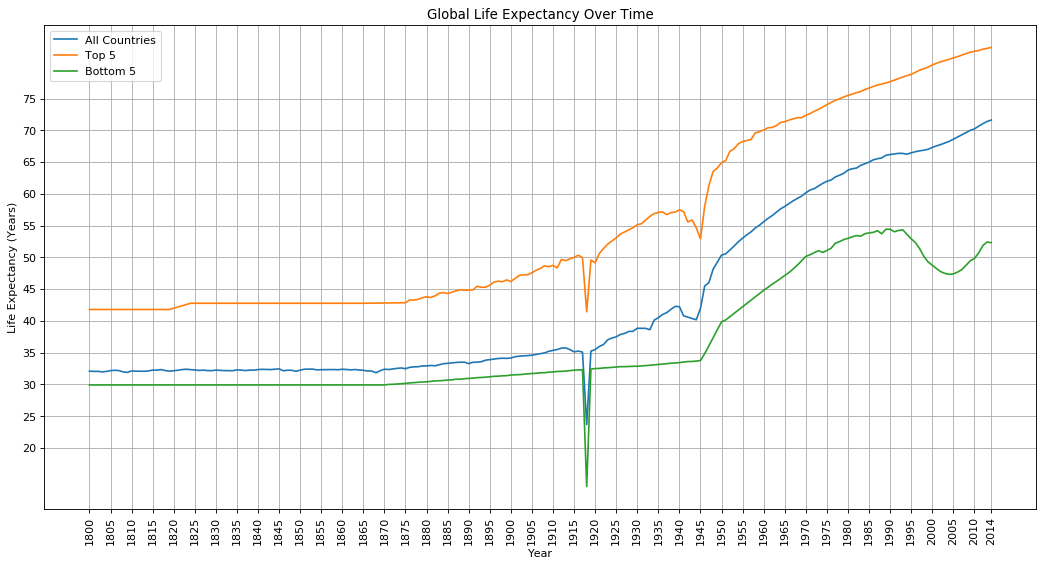

In [66]:
# plot the average life expectancy over time
plt.figure(figsize=(16,8), dpi=80)
plt.plot(mean_total_le)
plt.plot(mean_high_le)
plt.plot(mean_low_le)
plt.xticks(ticks=five_years, rotation='vertical')
plt.yticks(ticks=list(range(20,80,5)))
plt.xlabel('Year')
plt.grid()
plt.ylabel('Life Expectancy (Years)')
plt.title('Global Life Expectancy Over Time')
plt.legend(labels);

The Five Countries with the highest life expectancy are:
1. Japan
2. Singapore
3. Switzerland
4. Spain
5. Andorra

The Five Countries with the lowest life expectancy are:
1. Central African Republic
2. Lesotho
3. Swaziland
4. Sierra Leone
5. Somalia

For the most part, the life expectancy of the world is going up over time and drastically increases around the year 1945.

However, we see that there is a dip between the years 1915-1920.  Let's investigate whats going on...

In [39]:
df_le.mean()['1915':'1920']

1915    35.130428
1916    35.245455
1917    35.094652
1918    23.679412
1919    35.241711
1920    35.499465
dtype: float64

It looks like in the year 1918 there is a sharp decline in the world's life expectancy... at first glance, I figured these dips were caused by World War I (~40 million deaths per Wikipedia) and World War II (~75 million deaths Wikipedia).

After looking at the documentation from [Gapminder](https://www.gapminder.org/documentation/documentation/gapdoc004%20FAQ%20for%20life%20expectancy%20data%20version%207.pdf), they describe the two major life expectancy drops were due to the Spanish Flu in 1918 (infected 500 million people and resulted in 50-100 million deaths per Wikipedia) and due to World War II in the 1940s.

![](https://i.imgur.com/61o4aoa.png)

Gapminder provides explanations regarding only drastic drops and infers that increase in life expectancy are not due to any singular event but due to health improvements over longer periods of time.

#### Conclusions

1. The countries with the highest life expectancy are from Asia and Europe while the lowest life expectancy countries all came from Africa.
2. WWI and the Spanish Flu had a greater negative effect on the life expectancy of bottom 5 countries.
3. The life expectancy of the bottom 5 countries increased through the WWII period, however declined through the years 1990-2005.

### Research Question 2: How does the average income (GDP) of the world change over time?

Since we have everything set up already from the previous question, we will plot a similar graph.

In [40]:
# average gdp of all, the top 5, and the bottom 5 countries
mean_total_inc = df_inc.mean()
mean_low_inc = df_inc.sort_values(by=['2014']).head().mean()
mean_high_inc = df_inc.sort_values(by=['2014']).tail(5).mean()

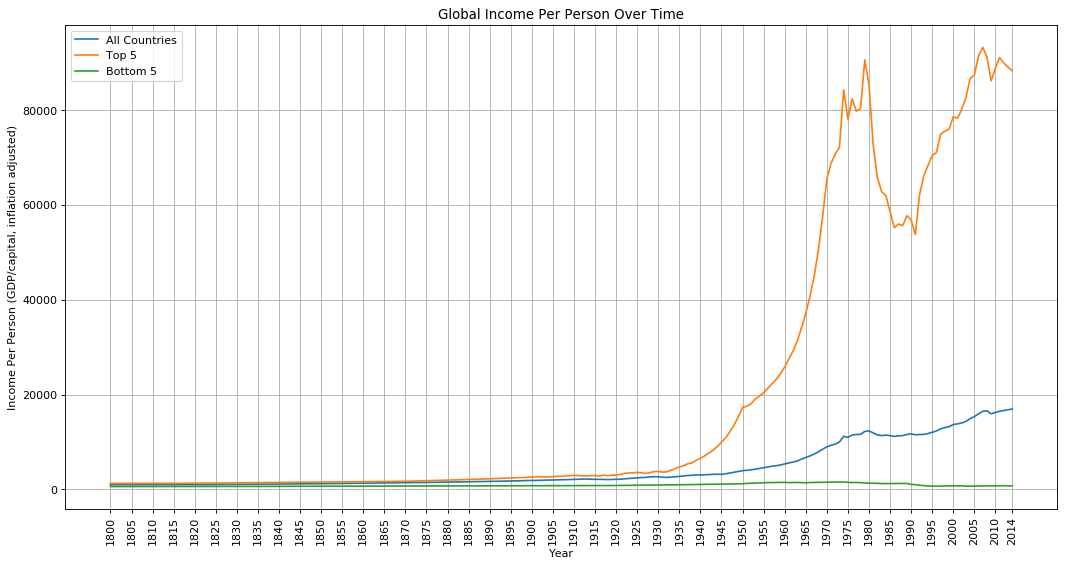

In [65]:
# plot average gdps
plt.figure(figsize=(16,8), dpi=80)
plt.plot(mean_total_inc)
plt.plot(mean_high_inc)
plt.plot(mean_low_inc)
plt.xticks(ticks=five_years, rotation='vertical')
plt.xlabel('Year')
plt.grid()
plt.ylabel('Income Per Person (GDP/capital, inflation adjusted)')
plt.title('Global Income Per Person Over Time')
plt.legend(labels);

Countries with the highest income (GDP):
1. Kuwait
2. Brunei
3. Singapore
4. Luxembourg
5. Qatar

Countries with the lowest income (GDP):
1. Central African Republic
2. Somalia
3. Congo
4. Burundi
5. Liberia

### Research Question 3: Is there a correlation between the average income (GDP) and average life expectancy?

Since we already have all of our lists from the previous queries, we will plot them on a scatter plot with some transparency to see trends and hot spots.

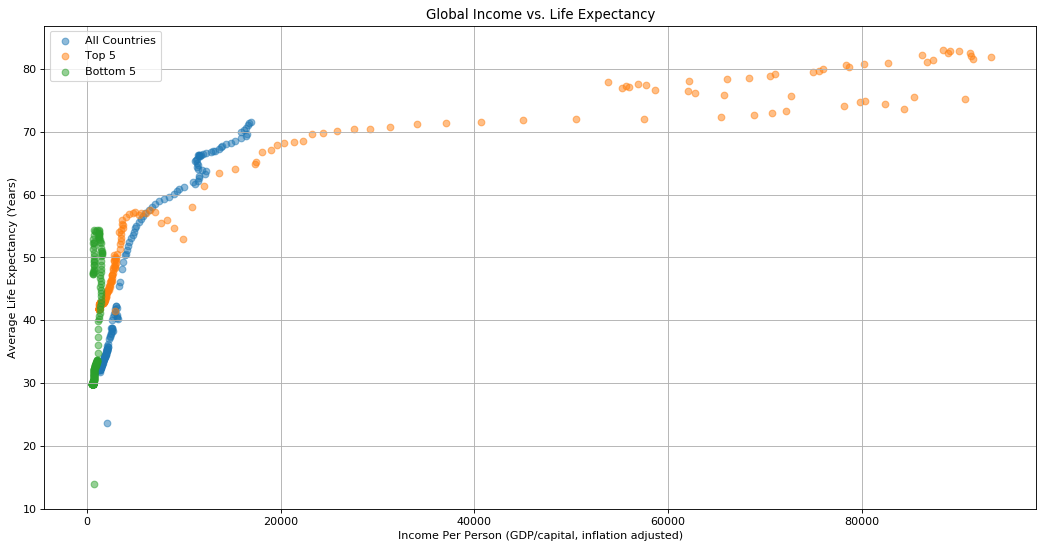

In [64]:
# plot income vs. life expectancy
plt.figure(figsize=(16,8), dpi=80)
plt.scatter(mean_total_inc, mean_total_le, alpha=0.5)
plt.scatter(mean_high_inc, mean_high_le, alpha=0.5)
plt.scatter(mean_low_inc, mean_low_le, alpha=0.5)
plt.title('Global Income vs. Life Expectancy')
plt.xlabel('Income Per Person (GDP/capital, inflation adjusted)')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid()
plt.legend(labels);

<a id='conclusions'></a>
## Conclusions

### From the Life Expectancy Plot
1. The countries with the highest life expectancy are from Asia and Europe while the lowest life expectancy countries all came from Africa.
2. WWI and the Spanish Flu had a greater negative correlation on the life expectancy of bottom 5 countries.
3. The life expectancy of the bottom 5 countries increased through the WWII period, however declined through the years 1990-2005.

### From the Income Per Person Plot
1. Based on GDP, the average income of the world is roughly 30x greater than the poorest countries while the average income of the richest countries was over 100x greater than the poorest countries.
2. The countries with the highest GDP per person are from the Middle East, Asia, and Europe while the countries with the lowest GDP per person are all from Africa.
3. It took roughly 30 years for the countries with the highest GDP to recover from a recession between the years of 1975-2005.